In [1]:
from keras.datasets import reuters

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

In [9]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
 train_labels[10] 

3

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
     return results

        

In [17]:
x_train = vectorize_sequences(train_data)

In [18]:
x_test = vectorize_sequences(test_data)


In [19]:
def to_one_hot(labels, dimension =64):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

In [20]:
one_hot_train_labels = to_one_hot(train_labels)

In [21]:
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
from keras.utils.np_utils import to_categorical

In [23]:
one_hot_train_labels = to_categorical(train_labels) 

In [24]:
one_hot_test_labels = to_categorical(test_labels)

In [27]:
from keras import models 
from keras import layers

In [28]:
model = models.Sequential() 
model.add(layers.Dense(124, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(124, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))


In [29]:
model.compile(optimizer='rmsprop',              loss='categorical_crossentropy',              metrics=['accuracy'])

In [30]:
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]


In [39]:
history = model.fit(partial_x_train,                    partial_y_train,                    epochs=8,                    batch_size=512,                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 297us/step - loss: 0.0911 - acc: 0.9562 - val_loss: 1.2090 - val_acc: 0.7950
Epoch 2/8
7982/7982 [==============================] - 2s 273us/step - loss: 0.0880 - acc: 0.9587 - val_loss: 1.2215 - val_acc: 0.7830
Epoch 3/8
7982/7982 [==============================] - 2s 273us/step - loss: 0.0879 - acc: 0.9572 - val_loss: 1.1390 - val_acc: 0.7960
Epoch 4/8
7982/7982 [==============================] - 2s 271us/step - loss: 0.0874 - acc: 0.9579 - val_loss: 1.2261 - val_acc: 0.7850
Epoch 5/8
7982/7982 [==============================] - 2s 272us/step - loss: 0.0865 - acc: 0.9572 - val_loss: 1.2661 - val_acc: 0.7800
Epoch 6/8
7982/7982 [==============================] - 2s 275us/step - loss: 0.0851 - acc: 0.9590 - val_loss: 1.1855 - val_acc: 0.8040
Epoch 7/8
7982/7982 [==============================] - 2s 273us/step - loss: 0.0818 - acc: 0.9589 - val_loss: 1.2401 - val_acc: 0.7910
Epoch 8

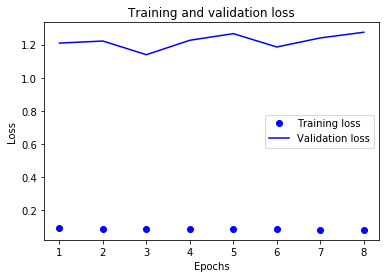

In [40]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

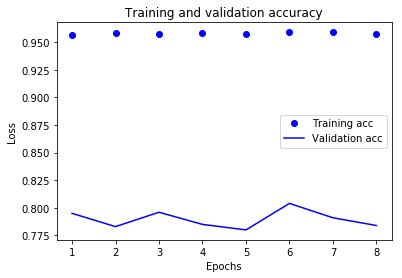

In [41]:
plt.clf()
acc = history.history['acc'] 
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()


In [43]:
results = model.evaluate(x_test, one_hot_test_labels)

results

2246/2246 [==============================] - 1s 348us/step


[1.4909292762022621, 0.7702582368655387]